In [4]:
%matplotlib inline
import os
import sys
import healpy as hp
import numpy as np
import matplotlib.pyplot as plt
import pickle as pk
sys.path.append('../')
import matplotlib 

In [2]:
%load_ext autoreload
%autoreload 2
import libparam_cross as method

usage: ipykernel_launcher.py [-h] [-ivt] [-ivp] [-dd] [-delens] [-cl] [-lh]
                             inifile
ipykernel_launcher.py: error: unrecognized arguments: -f


Simulation uses /project/projectdirs/litebird/simulations/maps/lensing_project_paper/S4BIRD/LiteBird_s4mask/RS/Maps
Simulation uses /project/projectdirs/litebird/simulations/maps/lensing_project_paper/S4BIRD/CMBS4/RS/Maps
Delensing uses QE: p
Workspace intializing from /project/projectdirs/litebird/simulations/maps/lensing_project_paper/S4BIRD/litebird_cmbs4/RS/Pseudo/workspace/coupling_matrix.fits


Bandpower calculated


Mean and STD of Bandpower: 100%|██████████| 100/100 [00:00<00:00, 2438.02simulation/s]


Fitting Lensed spectra between l=30 and l=150


Mean and STD of Bandpower: 100%|██████████| 100/100 [00:00<00:00, 4990.55simulation/s]


Bad posteriors: 0


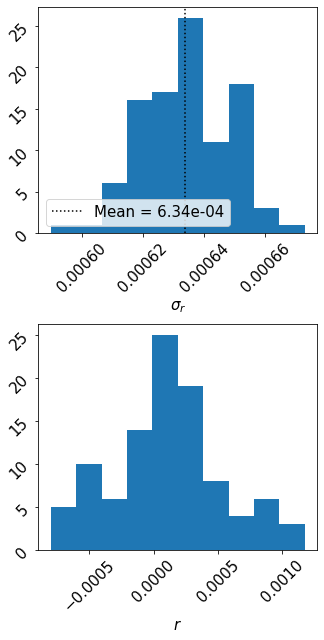

In [5]:
method.lh_lib.plot_stat(bw=.5,savefig=True)

In [4]:
#ell = np.arange(1025)
#dl = ell*(ell+1)/(2*np.pi)
#plt.loglog(hp.alm2cl(method.ivfs.get_sim_bmliklm(0))*dl)

In [8]:
from noise import S4_LAT

In [9]:
s4 = S4_LAT(fsky=.4)

../noise.py:158: RuntimeWarning: divide by zero encountered in power
  ellf = (ell/self.Tatmos_ell[:,None])**(self.Tatmos_alpha[:,None])
../noise.py:159: RuntimeWarning: invalid value encountered in multiply
  T_noise = self.Tatmos_cov[:,:,None] * (ellf[:,None,:] * ellf[None,:,:])**.5
../noise.py:162: RuntimeWarning: divide by zero encountered in power
  P_low_noise = (2*W[:,None]) * (ell / self.Patmos_ell[:,None])**self.Patmos_alpha[:,None]
../noise.py:164: RuntimeWarning: invalid value encountered in multiply
  (P_low_noise[:,None,:] * P_low_noise[None,:,:])**.5)


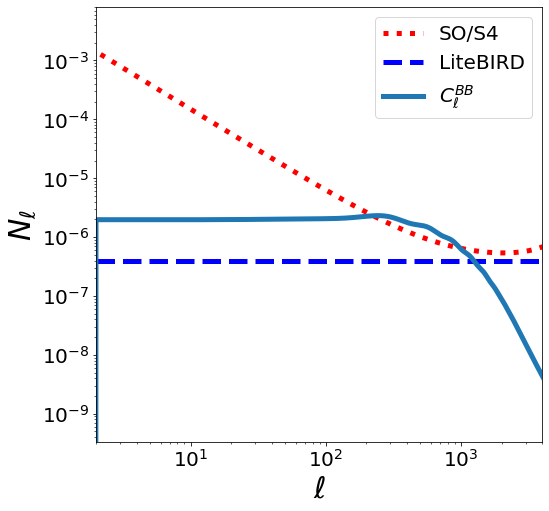

In [10]:
clbb = method.cl_len['bb']
cltt = method.cl_len['tt']
ell = np.arange(len(clbb))
plt.figure(figsize=(8,8))
plt.loglog(s4.ell,s4.noise_curves_P()[4], label="SO/S4",c='r',ls=':',lw=5)
plt.axhline(np.radians(2.15/60)**2,label="LiteBIRD",c='b',ls='--',lw=5)
plt.loglog(ell,clbb,label='$C_\ell^{BB}$',lw=5)
plt.xlabel('$\ell$',fontsize=30)
plt.ylabel("$N_\ell$",fontsize=30)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.legend(fontsize=20)
plt.xlim(2,4000)
plt.savefig('plots/noise.png',bbox_inches='tight')

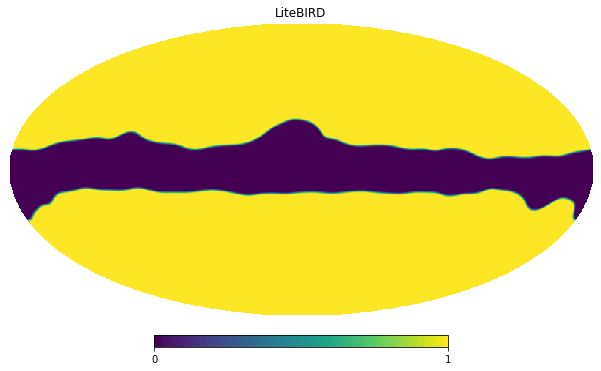

In [11]:
lb_mask = hp.read_map('/global/u2/l/lonappan/workspace/S4bird/Data/masks/litebird_2048_apo_C1_2.fits.gz')
hp.mollview(lb_mask,title='LiteBIRD')
plt.savefig('plots/lb_mask.png',bbox_inches='tight')


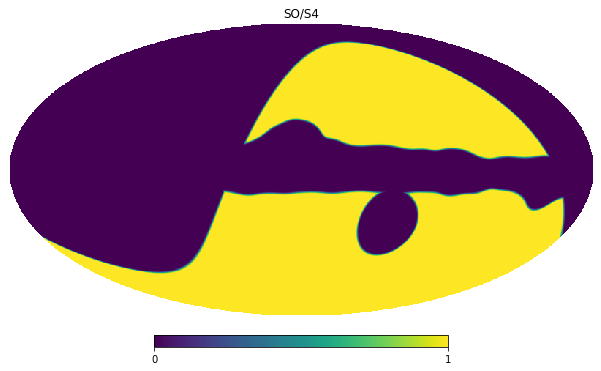

In [12]:
hp.mollview(hp.read_map('/global/u2/l/lonappan/workspace/S4bird/Data/masks/cmbs4_2048_apo_C1_2.fits.gz'),title='SO/S4')
plt.savefig('plots/so_mask.png',bbox_inches='tight')

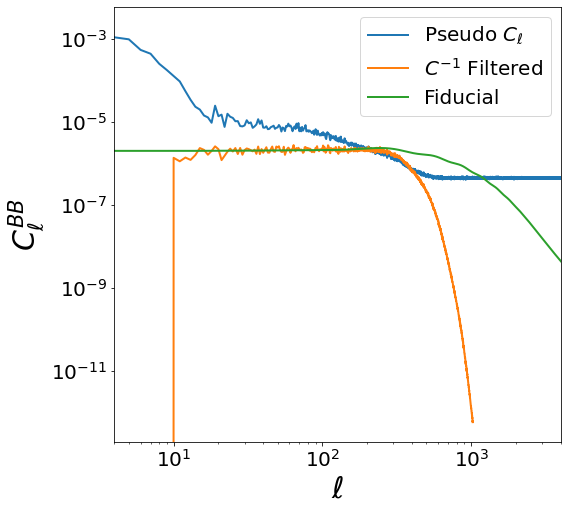

In [16]:
before_filt=hp.alm2cl(method.sims.get_sim_blm(0))
ell_b = np.arange(len(before_filt))
after_filt=hp.alm2cl(method.ivfs.get_sim_bmliklm(0))
ell_a = np.arange(len(after_filt))
plt.figure(figsize=(8,8))
plt.loglog(ell_b, before_filt/.7,lw=2,label='Pseudo $C_\ell$')
plt.loglog(ell_a, after_filt/.7,lw=2,label='$C^{-1}$ Filtered')
plt.loglog(ell,clbb,label='Fiducial',lw=2)
plt.xlabel('$\ell$',fontsize=30)
plt.ylabel("$C_\ell^{BB}$",fontsize=30)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.legend(fontsize=20)
plt.xlim(4,4000)
plt.savefig('plots/filtering.png',bbox_inches='tight')

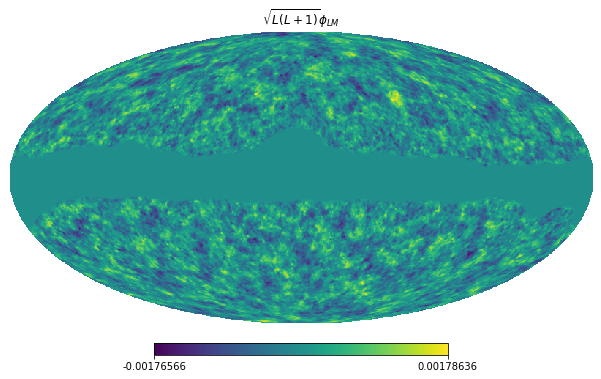

In [14]:
phi_map = hp.alm2map(method.delens_lib.kappa_wf(0),2048)
hp.mollview(phi_map*lb_mask,title='$\sqrt{L(L+1)} \phi_{LM}$')
plt.savefig('plots/phi.png',bbox_inches='tight')

In [3]:
method.lh_lib.plot_stat(savefig=True)

Bad posteriors: 0


/global/homes/l/lonappan/.conda/envs/PC2/lib/python3.7/site-packages/seaborn/distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 10 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
/global/homes/l/lonappan/.conda/envs/PC2/lib/python3.7/site-packages/seaborn/distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 10 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


Mean and STD of Bandpower: 100%|██████████| 100/100 [00:00<00:00, 2000.45simulation/s]
../delens.py:216: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "bbox_incehs" which is no longer supported as of 3.3 and will become an error two minor releases later
  pl.savefig(filename,bbox_incehs='tight')


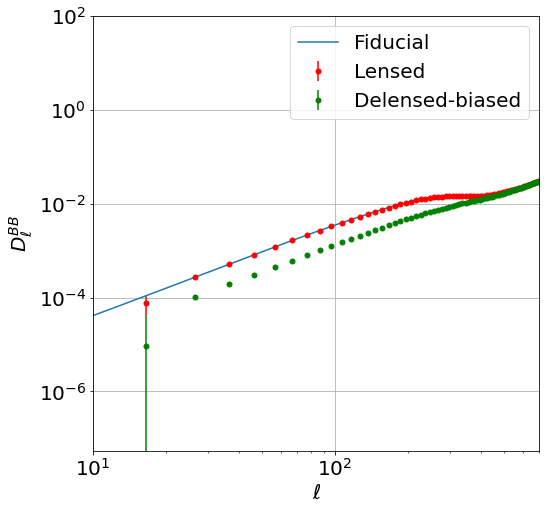

In [5]:
#method.eff_lib.plot_stat(700,debias=True,savefig=True,filename='plots/debiased.png')
#method.eff_lib.plot_stat(700,debias=False,savefig=True,filename='plots/bias.png')

../delens.py:260: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "bbox_inces" which is no longer supported as of 3.3 and will become an error two minor releases later
  pl.savefig(filename,bbox_inces='tight')


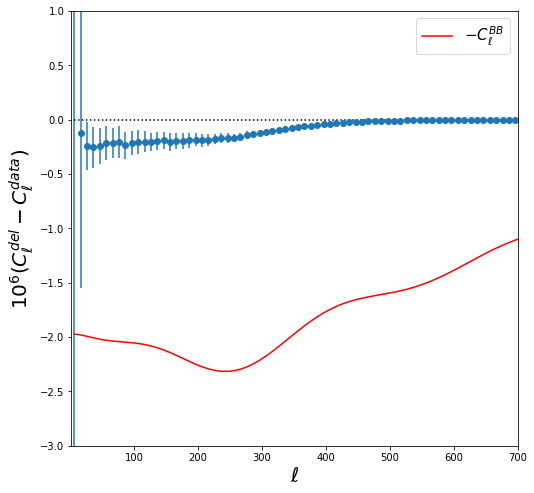

In [5]:
#method.eff_lib.plot_spectrum_difference(700,savefig=True,filename='plots/bias_spectra_diff.png')
method.eff_lib.plot_spectrum_difference(700,savefig=True,filename='plots/spectra_diff.png')